In [1]:
import pandas as pd
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}}) 

In [2]:
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [3]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [4]:
# id_vars == переменные индитификаторы
# value_vars == Все остальные столбцы, которые считаются "измеренными переменными"
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [5]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [6]:
# The names of ‘variable’ and ‘value’ columns can be customized:
pd.melt(df, id_vars=['A'], value_vars=['B'], var_name='myVarname', value_name='myValname')

,A,myVarname,myValname
0,a,B,1
1,b,B,3
2,c,B,5


In [7]:
# If you have multi-index columns:
df.columns = [list('ABC'), list('DEF')]

In [8]:
df

,A,B,C
,D,E,F
0,a,1,2
1,b,3,4
2,c,5,6


In [9]:
pd.melt(df, col_level=0, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [10]:
pd.melt(df, id_vars=[('A', 'D')], value_vars=[('B', 'E')])

,"(A, D)",variable_0,variable_1,value
0,a,B,E,1
1,b,B,E,3
2,c,B,E,5


In [1]:
# подгружаем все нужные пакеты
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
pd.melt(df, id_vars=['age'], value_vars=['gender']).head()

,age,variable,value
0,18393,gender,2
1,20228,gender,1
2,18857,gender,1
3,17623,gender,2
4,17474,gender,1


In [20]:
# сам по себе датафрейм не меняеться - так что если мы хотим зафиксировать результаты, нужно давать ссылку на вывод метода.
pd.melt(df, id_vars=['age'], value_vars=['gender', 'cardio']).head()

,age,variable,value
0,18393,gender,2
1,20228,gender,1
2,18857,gender,1
3,17623,gender,2
4,17474,gender,1


In [22]:
pd.melt(df, id_vars=['age','gender'], value_vars=['cardio']).head()

,age,gender,variable,value
0,18393,2,cardio,0
1,20228,1,cardio,1
2,18857,1,cardio,1
3,17623,2,cardio,1
4,17474,1,cardio,0


In [26]:
pd.melt(df, id_vars=['age','gender'], value_vars=['cardio', 'smoke'])

,age,gender,variable,value
0,18393,2,cardio,0
1,20228,1,cardio,1
2,18857,1,cardio,1
3,17623,2,cardio,1
4,17474,1,cardio,0
5,21914,1,cardio,0
6,22113,1,cardio,0
7,22584,2,cardio,1
8,17668,1,cardio,0
9,19834,1,cardio,0


In [37]:
df = pd.melt(df, id_vars=['weight'], value_vars=['gender'])

In [42]:
df.head()

,weight,variable,value
0,62.0,gender,2
1,85.0,gender,1
2,64.0,gender,1
3,82.0,gender,2
4,56.0,gender,1


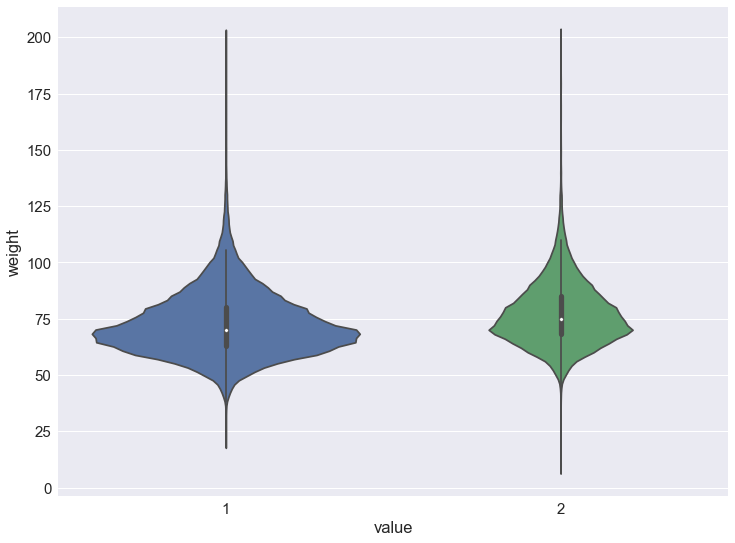

In [52]:
sns.violinplot(x='value', y='weight', scale='count',data=df)

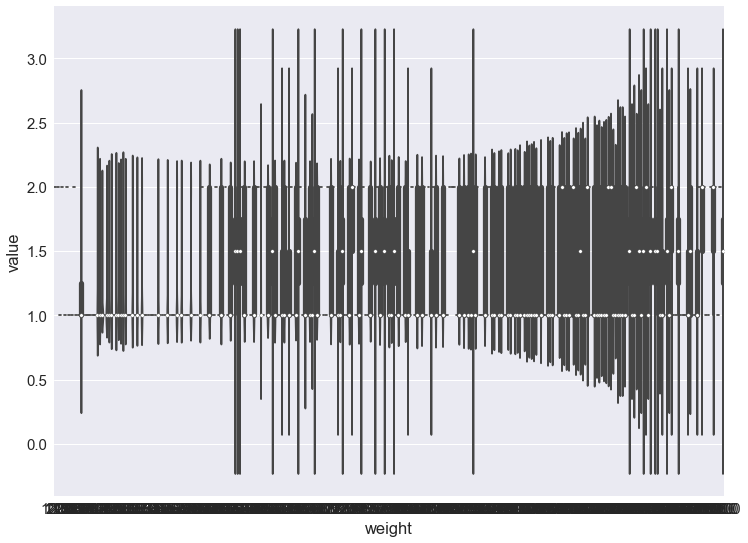

In [45]:
sns.violinplot(x='weight', y='value', data=df)

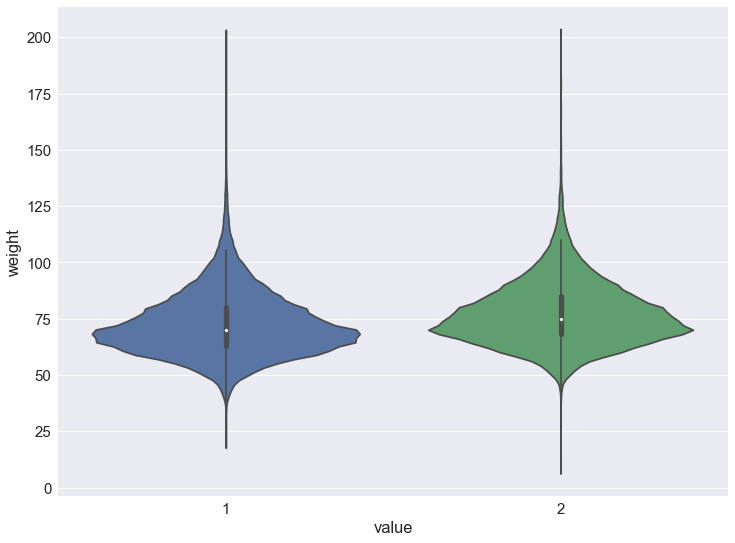

In [46]:
sns.violinplot(x='value', y='weight', data=df)

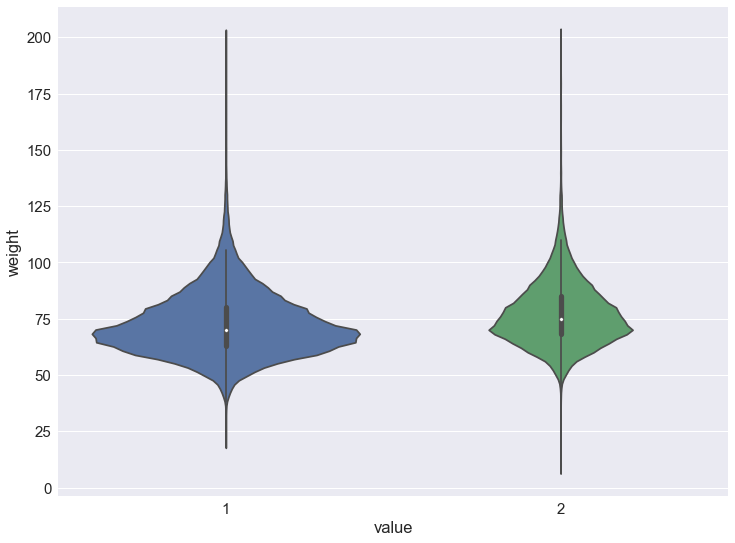

In [47]:
sns.violinplot(x='value', y='weight', scale='count',data=df)

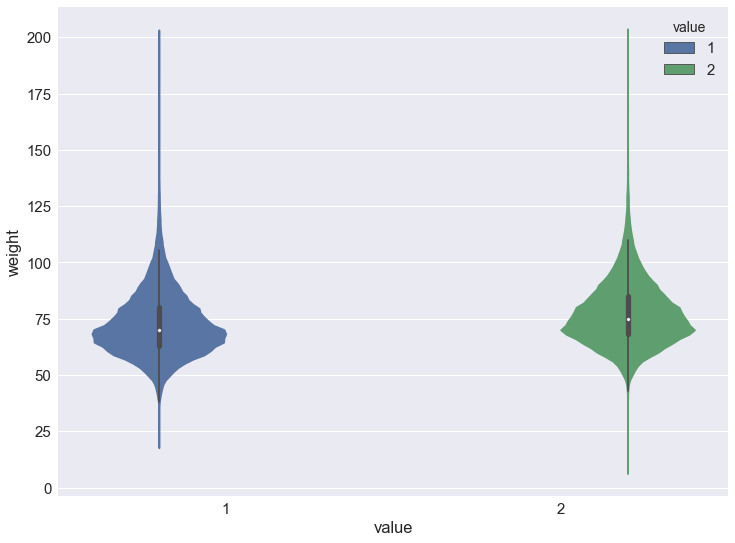

In [58]:
sns.violinplot(x='value', y='weight', scale='count', hue="value", data=df)

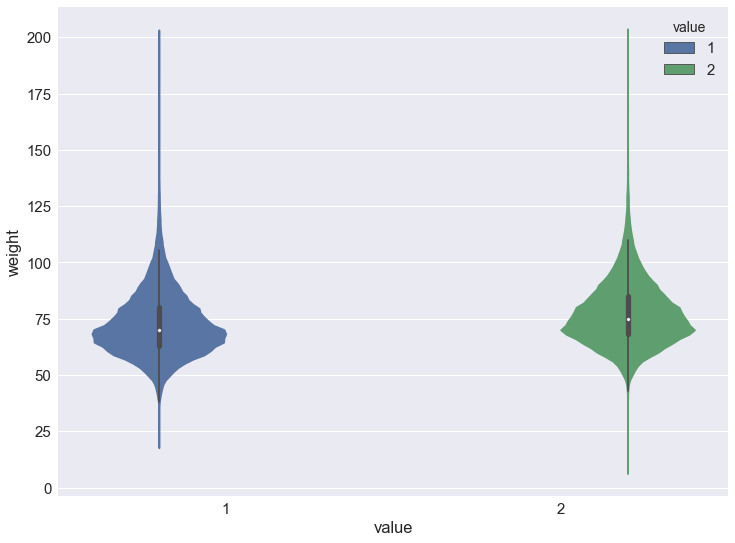

In [59]:
sns.violinplot(x='value', y='weight', scale='count', hue="value", data=df);
# hue == это хуета в верхнем правом углу и не более того.

In [72]:
df.head()

,weight,variable,value
0,62.0,gender,2
1,85.0,gender,1
2,64.0,gender,1
3,82.0,gender,2
4,56.0,gender,1


In [73]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


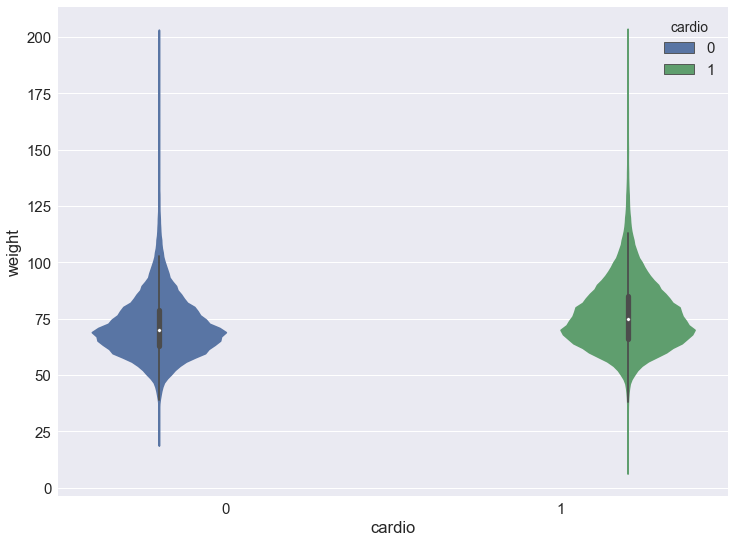

In [75]:
sns.violinplot(x="cardio", y="weight", hue='cardio', data=df);

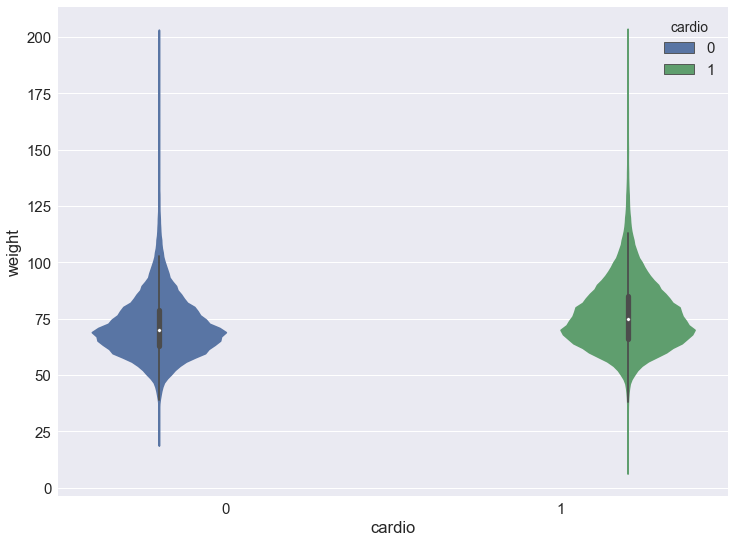

In [76]:
sns.violinplot(x="cardio", y="weight", hue='cardio', scale = 'count', data=df);

In [77]:
df = pd.melt(df, id_vars=['weight'], value_vars=['cardio'])

In [78]:
df.head()

,weight,variable,value
0,62.0,cardio,0
1,85.0,cardio,1
2,64.0,cardio,1
3,82.0,cardio,1
4,56.0,cardio,0


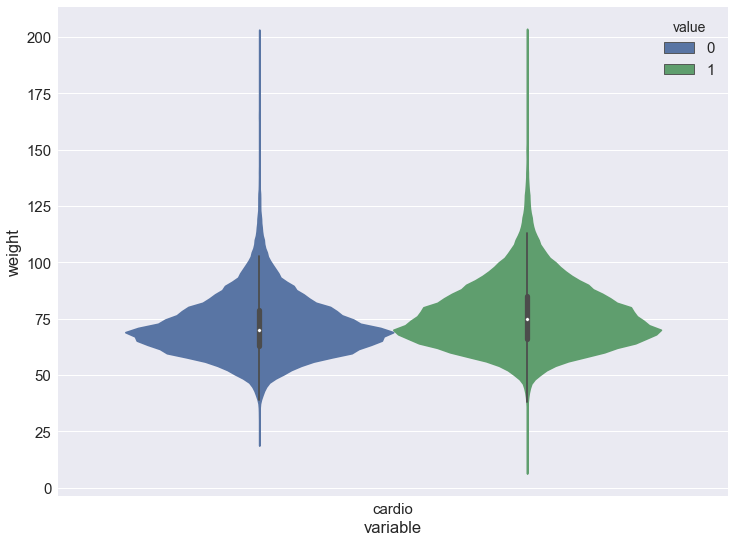

In [81]:
sns.violinplot(x="variable", y="weight", hue='value', scale = 'count', data=df);

In [87]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df = pd.melt(df, id_vars=['weight', 'height'], value_vars=['cardio'])
df

,weight,height,variable,value
0,62.0,168,cardio,0
1,85.0,156,cardio,1
2,64.0,165,cardio,1
3,82.0,169,cardio,1
4,56.0,156,cardio,0
5,67.0,151,cardio,0
6,93.0,157,cardio,0
7,95.0,178,cardio,1
8,71.0,158,cardio,0
9,68.0,164,cardio,0


In [8]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
df = pd.melt(df, id_vars=['weight', 'height'], value_vars=['gender'])
df

,weight,height,variable,value
0,62.0,168,gender,2
1,85.0,156,gender,1
2,64.0,165,gender,1
3,82.0,169,gender,2
4,56.0,156,gender,1
5,67.0,151,gender,1
6,93.0,157,gender,1
7,95.0,178,gender,2
8,71.0,158,gender,1
9,68.0,164,gender,1


In [18]:
df.reset_index()
df

,weight,height,variable,value
0,62.0,168,gender,2
1,85.0,156,gender,1
2,64.0,165,gender,1
3,82.0,169,gender,2
4,56.0,156,gender,1
5,67.0,151,gender,1
6,93.0,157,gender,1
7,95.0,178,gender,2
8,71.0,158,gender,1
9,68.0,164,gender,1


In [26]:
df['variable']

0        gender
1        gender
2        gender
3        gender
4        gender
5        gender
6        gender
7        gender
8        gender
9        gender
10       gender
11       gender
12       gender
13       gender
14       gender
15       gender
16       gender
17       gender
18       gender
19       gender
20       gender
21       gender
22       gender
23       gender
24       gender
25       gender
26       gender
27       gender
28       gender
29       gender
          ...  
69970    gender
69971    gender
69972    gender
69973    gender
69974    gender
69975    gender
69976    gender
69977    gender
69978    gender
69979    gender
69980    gender
69981    gender
69982    gender
69983    gender
69984    gender
69985    gender
69986    gender
69987    gender
69988    gender
69989    gender
69990    gender
69991    gender
69992    gender
69993    gender
69994    gender
69995    gender
69996    gender
69997    gender
69998    gender
69999    gender
Name: variable, Length: 

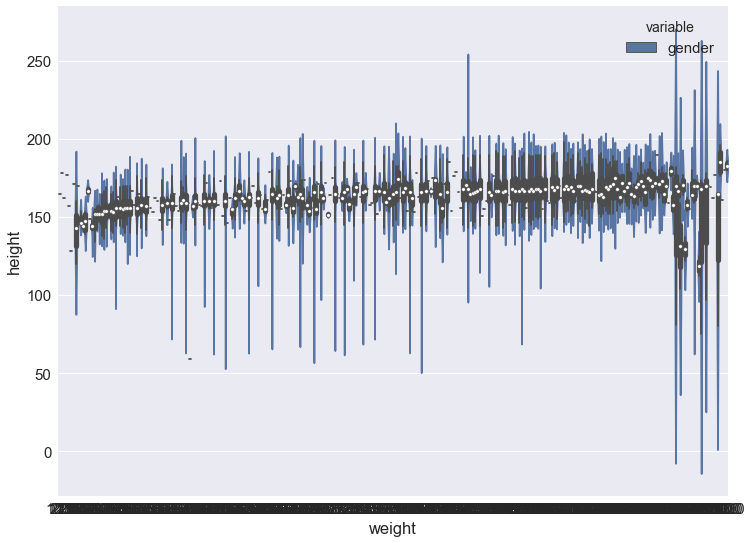

In [27]:
sns.violinplot(x='weight', y='height', hue = 'variable', data=df)

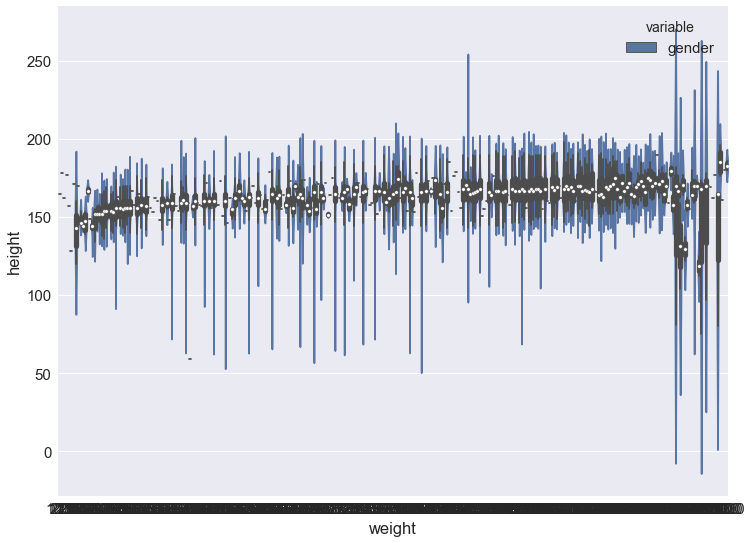

In [28]:
sns.violinplot(x='weight', y='height', hue = 'variable', scale = 'count', data=df)

In [29]:
# возможно мега важно
sns.set(font='DejaVu Sans')

In [31]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


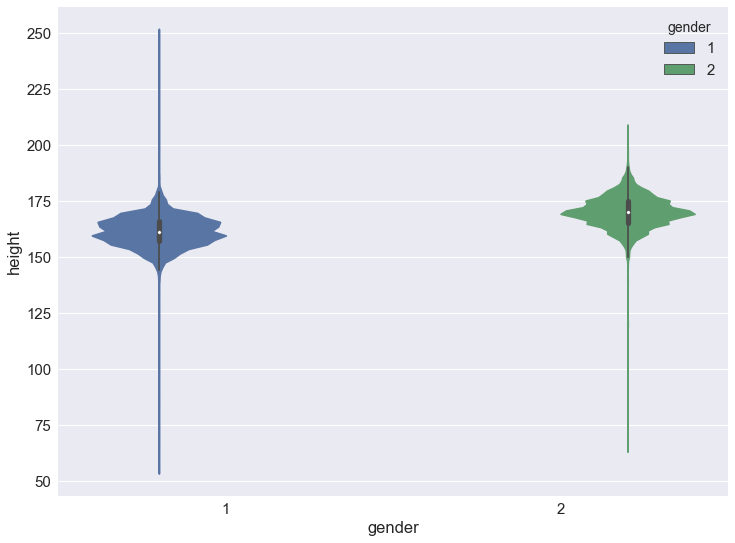

In [3]:
sns.violinplot(x='gender', y='height', hue = 'gender', data=df)

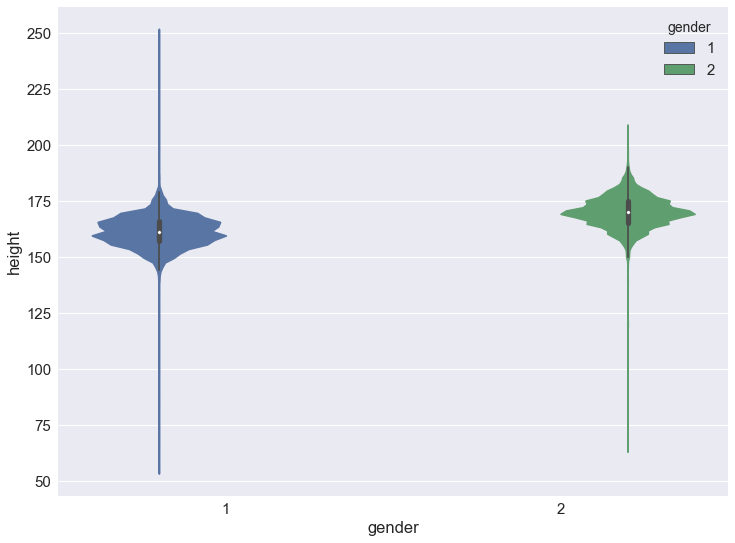

In [4]:
sns.violinplot(x='gender', y='height', hue = 'gender', scale='count', data=df)

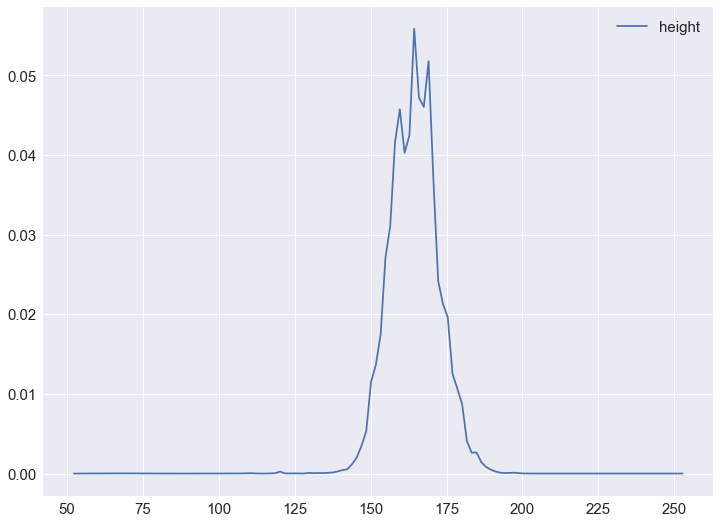

In [14]:
sns.kdeplot(df['height'])

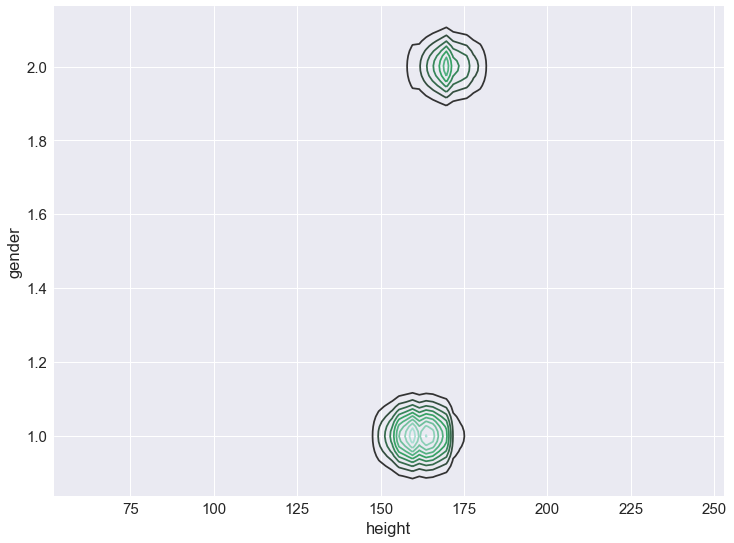

In [15]:
sns.kdeplot(df['height'], df['gender'])

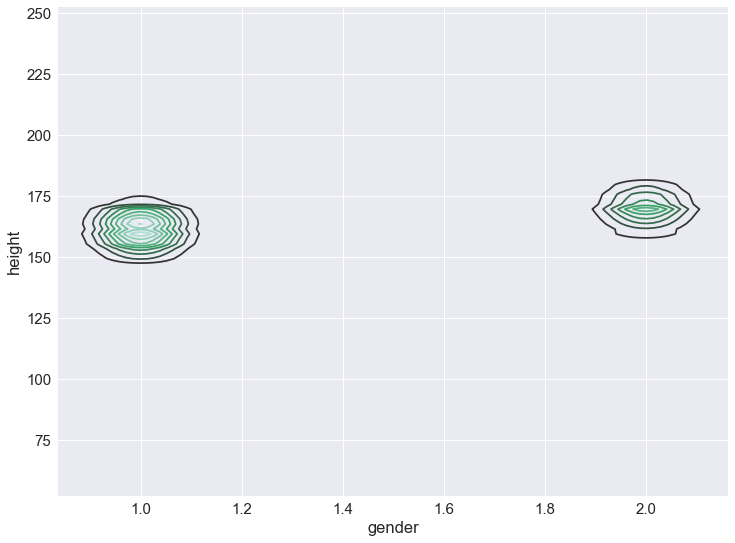

In [16]:
sns.kdeplot(df['gender'], df['height'])

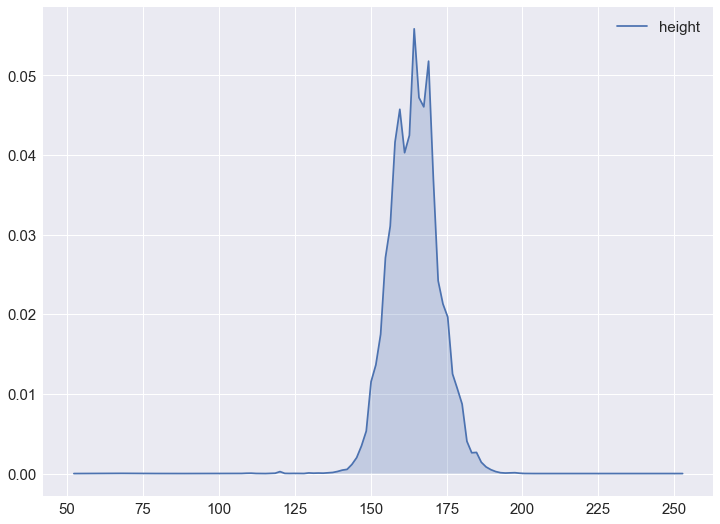

In [18]:
sns.kdeplot(df['height'], shade=True)

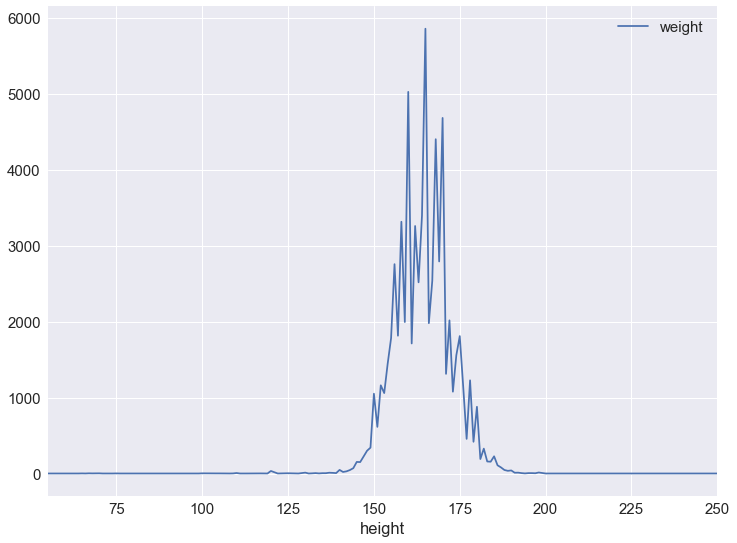

In [27]:
age_data = df[[x for x in df.columns if 'height' in x] + ['weight']]
# потренируемся
age_data.groupby('height').count().plot()

In [28]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

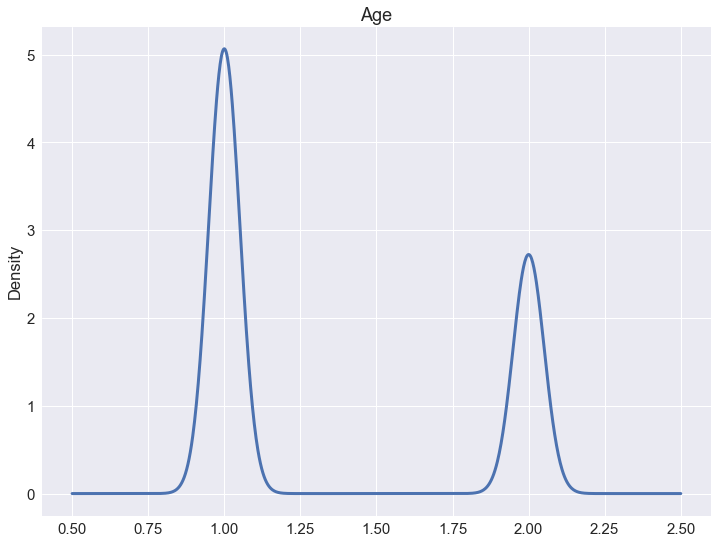

In [33]:
df['gender'].plot(kind='kde', linewidth=3);  plt.title('Age');

In [35]:
pd.melt(df, id_vars=['height'], value_vars=['gender']).head()

,height,variable,value
0,168,gender,2
1,156,gender,1
2,165,gender,1
3,169,gender,2
4,156,gender,1


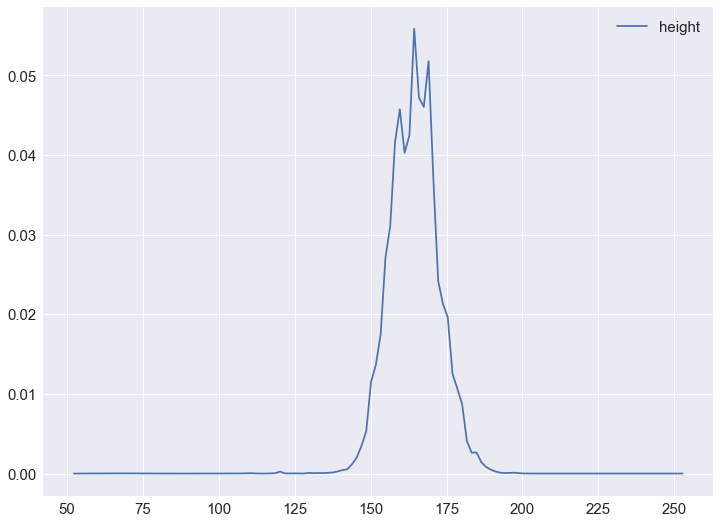

In [39]:
sns.kdeplot(df['height'])

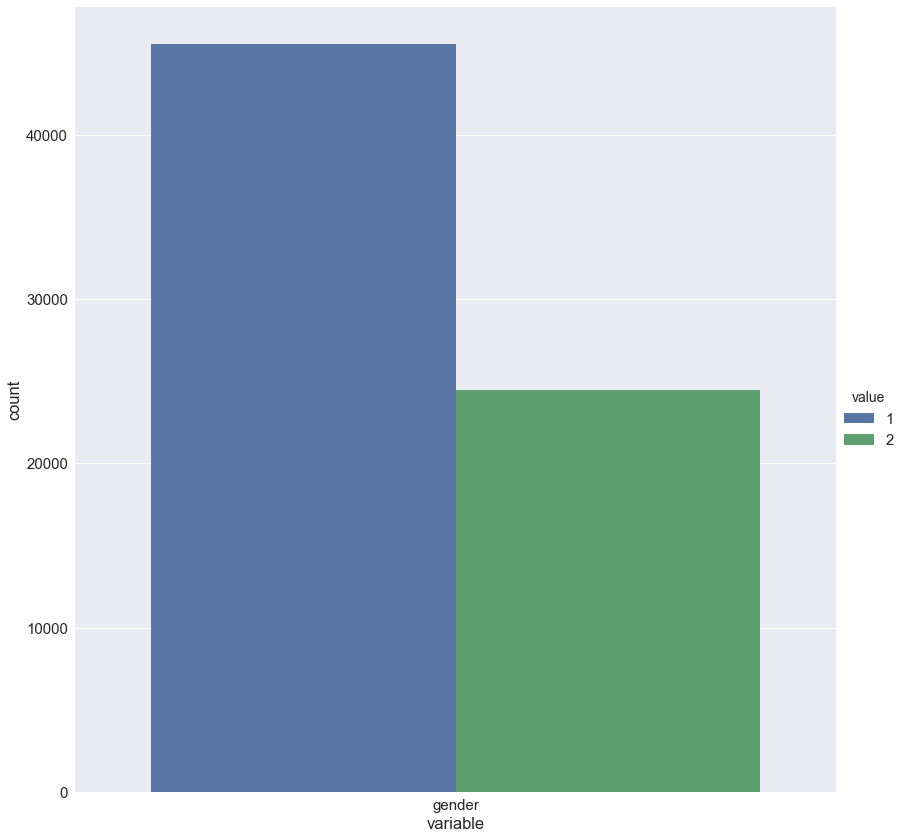

In [41]:
df_uniques = pd.melt(frame=df, id_vars=['height'], value_vars=['gender'])

df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', data=df_uniques, kind='bar', size=12);
                                           
                                         

In [42]:
df_uniques

,variable,value,count
0,gender,1,45530
1,gender,2,24470


In [ ]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

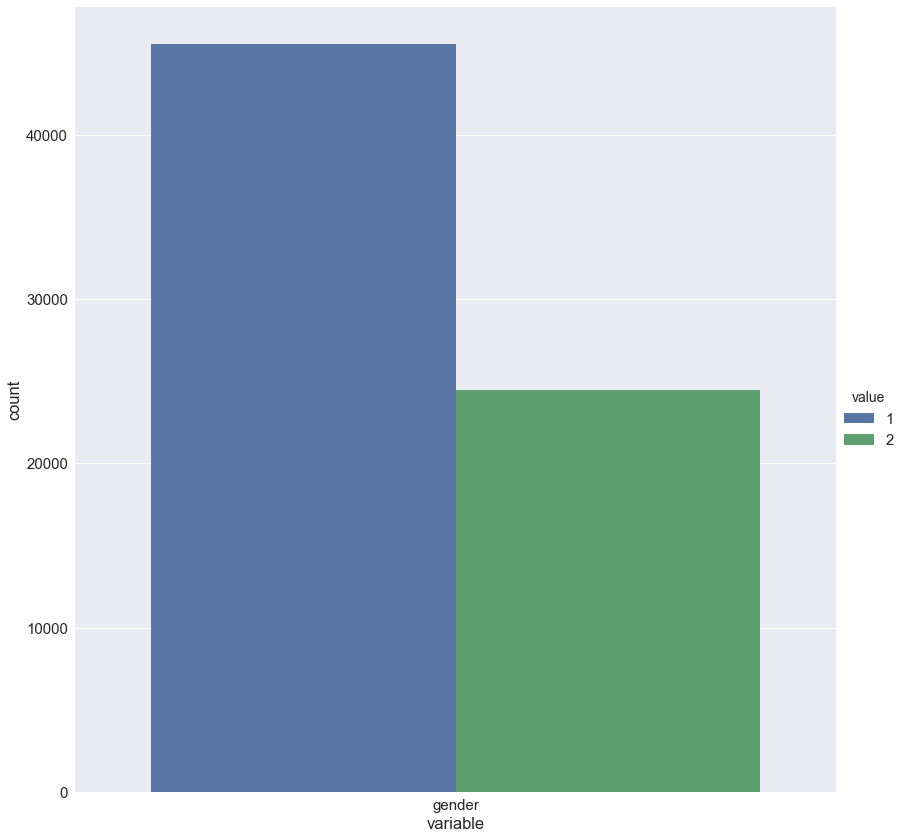

In [50]:
df_uniques = pd.melt(frame=df, value_vars=['gender'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

In [51]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


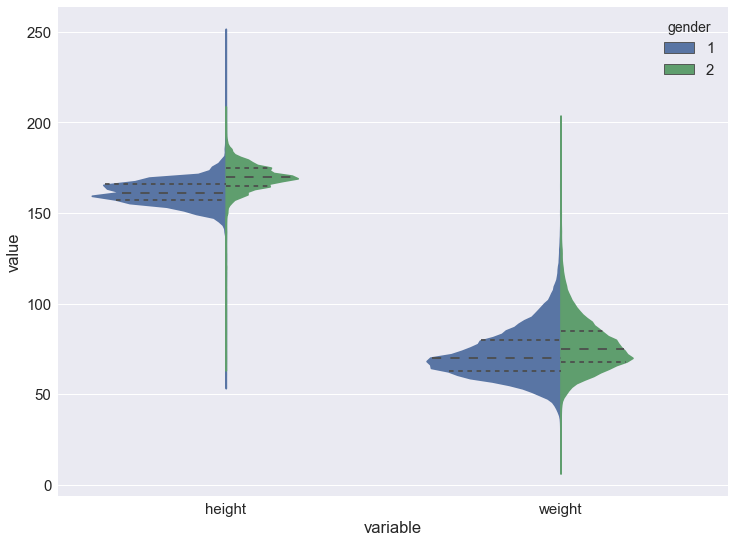

In [54]:
df = pd.melt(df, value_vars=['height', 'weight'], id_vars='gender')
sns.violinplot(x='variable', hue='gender', y='value', data = df, scale = "count", split=True, inner="quartile")

In [58]:
df.head()

,gender,variable,value
0,2,height,168.0
1,1,height,156.0
2,1,height,165.0
3,2,height,169.0
4,1,height,156.0


In [60]:
# не работает потмоу что заметил датафрейм и height там нет - есть variable
sns.kdeplot(df['height'][train.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['height'][train.gender==2], shade=True, color="b", label='2')

KeyError: 'height'

In [61]:
df = pd.read_csv('J:/HiEnd/mlcourse_open-master (2)/mlcourse_open-master/data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


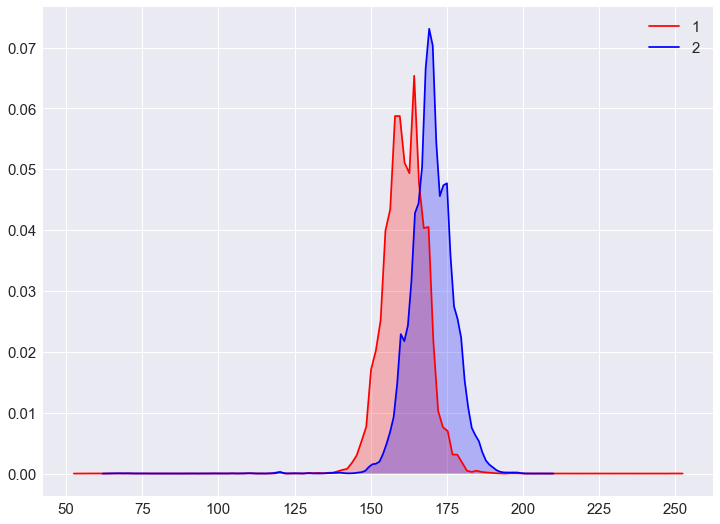

In [63]:
sns.kdeplot(df['height'][df.gender==1], shade=True, color="r", label='1')
sns.kdeplot(df['height'][df.gender==2], shade=True, color="b", label='2')

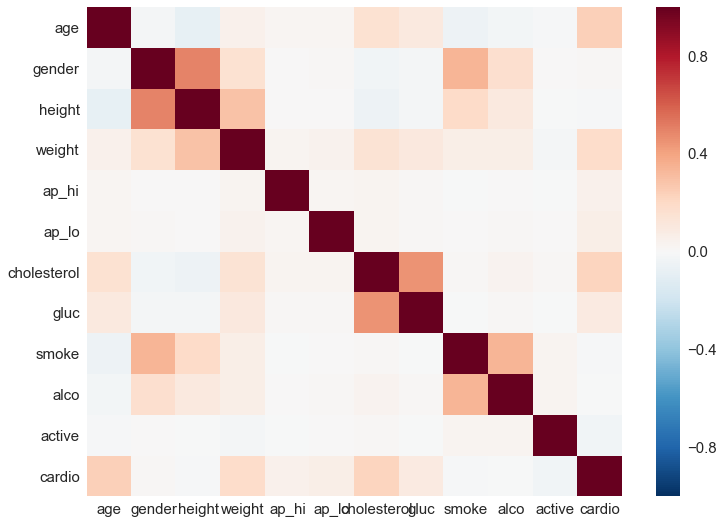

In [3]:
correlation = df.corr('pearson')
sns.heatmap(correlation)


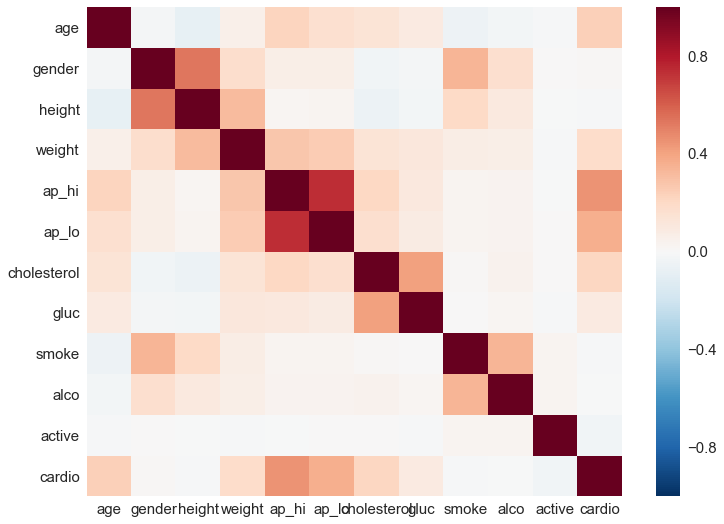

In [5]:
corr_spearman = df.corr('spearman')
sns.heatmap(corr_spearman)
#help(corr)